# BEE 4310/6310: Environmental Statistics and Learning  <br> Assignment #2 (10 pts)

**Include responses to everything below in bold (including plots), and make sure your final assignment is well organized in a single markdown PDF submitted to Canvas. This makes it easier to grade (and easier to give partial credit).**

**Remember to include an acknowledgement at the bottom of this assignment if generative AI was used for coding support, including a list of the problems for which it was used.**

<img src="LearningOutcomes_2.png" width="1000"/>

**Techniques and Topics:** 
- Visual data exploration
- t-tests in regression
- F-tests in regression
- Testing assumptions of regression analysis
- Data transformations
- Prediction skill and uncertainty
- Gradient decent

**Packages and functions covered in Data Camp exercises (note: not all will be needed in the problems below)** 

| numpy as np       | Matplotlib.pyplot as plt  | pandas as pd  | scipy.stats | seaborn as sns | statsmodels.formula.api | statsmodels.api |
| -----------       | ------------------------  | ------------  | ----------- | -------------- | ----------------------- | --------------- |
|np.array           | plt.plot                  | pd.DataFrame  | uniform.cdf | sns.scatterplot| ols                     | qqplot          |
|np.mean            | plt.show                  | pd.read_csv   | uniform.rvs | sns.lmplot     | ols.fit
|np.median          | plt.xscale                | df.iloc       | uniform.ppf | sns.regplot    | ols.params
|np.var             | plt.yscale                | df.loc        | binom.cdf   | sns.displot    | ols.predict
|np.std             | plt.scatter               | df.sample     | binom.rvs   | sns.residplot  | ols.fittedvalues
|np.quantile        | plt.hist                  | df.iterrows   | binom.ppf   |                | ols.resid
|np.random.rand     | plt.clf                   | df.apply      | norm.cdf    |                | ols.rsquared
|np.random.randint  | plt.xlabel                | df.assign     | norm.rvs    |                | ols.mse_resid
|np.random.seed     | plt.tlabel                | series.corr   | norm.ppf    |                | ols.summary
|np.logical_or      | plt.title                 |               | poisson.cdf |                | ols.get_influence().resid_studentized_internal
|np.logical_and     | plt.xticks                |               | poisson.rvs |                | ols.get_influence().summary_frame()
|np.nditer          | plt.yticks                |               | poisson.pmf |                | logit
|np.transpose       | plt.text                  |               |             |                | logt.pred_table
|np.arange          | plt.grid                  |               |             |
|                   | plt.figure                |               |             |
|                   | plt.axis                  |               |             |
|                   | plt.axhline               |               |             |
|                   | plt.axvline               |               |             |


<img align="right" src="DBP.png" width="500"/>

To deliver safe drinking water to customers, water utilities need to first treat raw water from the environment in order to remove pathogens and other harmful substances. As part of this process, dininfectants like chlorine are often added to the water before it is piped into the distribution system and sent to people’s homes. However, these disinfectants can interact with natural organic matter and other halogens (e.g., bromide) in the water to form disinfection byproducts (DBPs). In high quantities, these DBPs are carcinogenic. 

There are many different types of DBPs. One class of DBP is known as haloacetic acids (HAAs). The EPA regulates the sum of the concentration of five different HAAs in drinking water: dibromoacetic acid, dichloroacetic acid, monobromoacetic acid, monochloroacetic acid, and trichloroacetic acid. The total concentration of these five compounds is termed HAA5 and legally cannot exceed 60 micrograms per liter (𝜇g/L). Accordingly, water utilities need to regularly measure HAA5 in their drinking water to ensure they are meeting this regulatory limit. 

However, there are other HAAs that can form that are not included in HAA5. For instance, there are four HAAs that are less common but are more carcinogenic: bromochloroacetic acid, bromodichloroacetic acid, chlorodibromoacetic acid, and tribromoacetic acid. The total concentration of these four compounds is termed HAA4. HAA4 remains unregulated and is not regularly measured by water utilities. However, periodically (ever few years) the EPA requires utilities to measure these unregulated contaminants under the Unregulated Contaminant Monitoring Rule (UCMR).   

Using data collected by water utilities across New York under the most recent UCMR, your assignment is to explore whether the concentrations of HAA4 can be predicted using measures of water quality that utilities regularly collect, including HAA5 concentrations and precursors in the raw water: total organic carbon (TOC; a proxy or natural organic matter) and bromide concentrations.  You will also explore whether different water treatment technologies influence the concentration of HAA4 in drinking water.


1. Import the following packages: numpy, pandas, matplotlib.pyplot. Also import norm from scipy.stats. Finally, import ols from statsmodels.formula.api.

    Download the UCMR_4.csv file from Canvas and load it in as a Pandas data frame. This file contains the following variables for 1200 unique locations associated with water utilities across New York State:
    -	HAA4 concentrations in micrograms per liter (ug/L)
    -	HAA5 concentrations in micrograms per liter (ug/L)
    -	Bromide concentrations in micrograms per liter (ug/L)
    -	Total organic carbon (TOC) in milligrams per liter (mg/L)
    -	The presence or absence of ultraviolet (UV) disinfection for that water utility 
    -	The presence or absence of permanganate as a pre-oxidant for that water utility


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('UCMR_4.csv')
df.head()

,PWSName,SamplePointName,CollectionDate,HAA4_ug_L,HAA5_ug_L,Bromide_ug_L,TOC_mg_L,UV,Permanganate
0,796_Bedford_Road_Apartments,Unit_105_Laundry_Room_Sink,1/16/18,1.709,1.140,32.95,0.50,no,no
1,796_Bedford_Road_Apartments,Unit_105_Laundry_Room_Sink,7/17/18,1.289,1.115,32.90,0.50,no,no
2,Albertson_Water_District,DEWEY_AVE_BATHROOM,11/12/19,0.320,0.520,23.84,0.50,no,no
3,Auburn,311_North_Division,7/5/18,4.900,33.300,15.00,3.88,no,no
4,Auburn,33_York,7/5/18,2.400,22.100,15.00,3.88,no,no


2. **(1 pt)** Let's start by plotting the data we have, specifically assessing how HAA4 relates to the three continuous predictors (HAA5, bromide, and TOC). 
    
    **(a) Create scatter plots between HAA4 and each of these three predictors, being sure to label all axes (with units).**  
    
    **(b) Also calculate and report the Pearson correlation coefficient between HAA4 and HAA5, bromide, and TOC (all rounded to two decimal places).** 
    
    **(c) Comment on the strength and sign of the relationships you see.**

    As an aside, when creating many different plots using matplotlib.pyplot, you can arrange them nicely into a single panel grid of figures using the plt.subplot() function. You can control the size of the overall figure using plt.figure(figsize=()). I've inserted this code for you below. In your answer, insert your code for creating each figure below the separate plt.subplot() calls. 

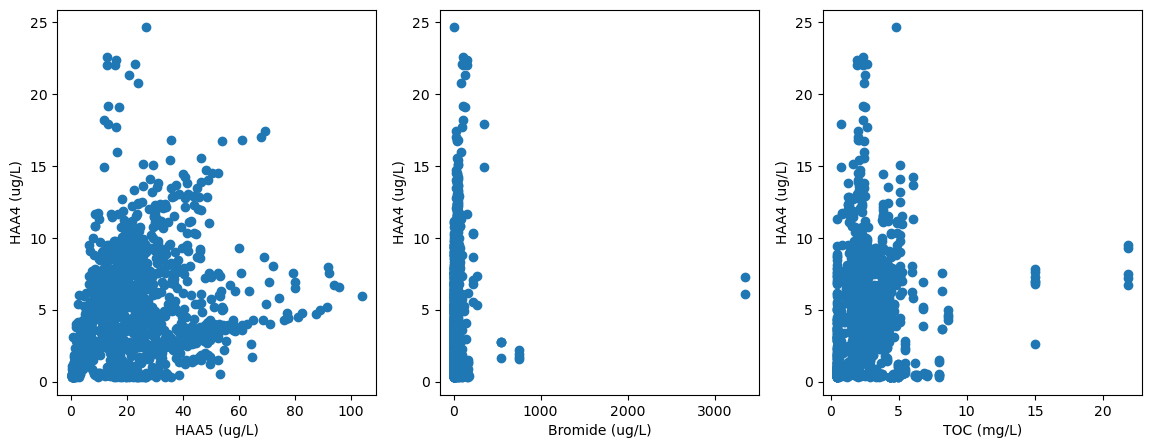

In [83]:
plt.figure(figsize=(14,5))  #controls the size of the figure. I made it very wide here (14>>5) to accommodate the 3-panel plot below. 

plt.subplot(1,3,1)  #creates a figure with 3 panels, organized in 1 row and 3 columns. the last '1' indiciates we will add a figure to the first panel.
#<put your code for the first figure here>
plt.scatter(data = df, x = 'HAA5_ug_L', y = 'HAA4_ug_L')
plt.xlabel('HAA5 (ug/L)')
plt.ylabel('HAA4 (ug/L)')

plt.subplot(1,3,2)  #now we will add a figure to the second panel.
#<put your code for the second figure here>
plt.scatter(data = df, x = 'Bromide_ug_L', y = 'HAA4_ug_L')
plt.xlabel('Bromide (ug/L)')
plt.ylabel('HAA4 (ug/L)')

plt.subplot(1,3,3)  #now we will add a figure to the third panel.
#<put your code for the third figure here>
plt.scatter(data = df, x = 'TOC_mg_L', y = 'HAA4_ug_L')
plt.xlabel('TOC (mg/L)')
plt.ylabel('HAA4 (ug/L)')

#<finally, add code to calculate and report correlation values here>
c1 = df['HAA4_ug_L'].corr(df['HAA5_ug_L'])
c2 = df['HAA4_ug_L'].corr(df['Bromide_ug_L'])
c3 = df['HAA4_ug_L'].corr(df['TOC_mg_L'])



The correleation coefficients between HAA4 and HAA5, Bromide, and TOC are 0.23, 0.04, 0.08 respectively. All the correlations are not very strong, but the correlation between HAA4 and HAA5 is relatively the strongest.

3. **(1 pt)** When developing a regression model, it is also helpful to examine the distribution of the dependent and independent variables, and possibly to transform those variables if they are very skewed. This can help remove the influence of outliers and better highlight the relationship between variables. 

    **(a) Using a 2X2 panel of figures, create histograms of the four numerical variables under consideration, including HAA4 (the response variable) and HAA5, bromide, and TOC (the predictors). Be sure to label both axes, with units. Briefly comment on the shape of the distribution of each of these four variables. Are they symmetric or are they skewed?**

    (b) Now create 4 new columns in the UCMR4 data frame associated with the (natural) log transformed versions of HAA4, HAA5, bromide, and TOC. **Create another 2X2 panel of histograms (with labeled axes) for these transformed data, and again comment on the shape of their distributions (particularly in comparison to the distributions before log-transformation).** Note: when labeling axes with log units, you can write the units as 'log - ug/L' or 'log - mg/L'. 

[Text(0.5, 1.0, 'Distribution of log(TOC)')]

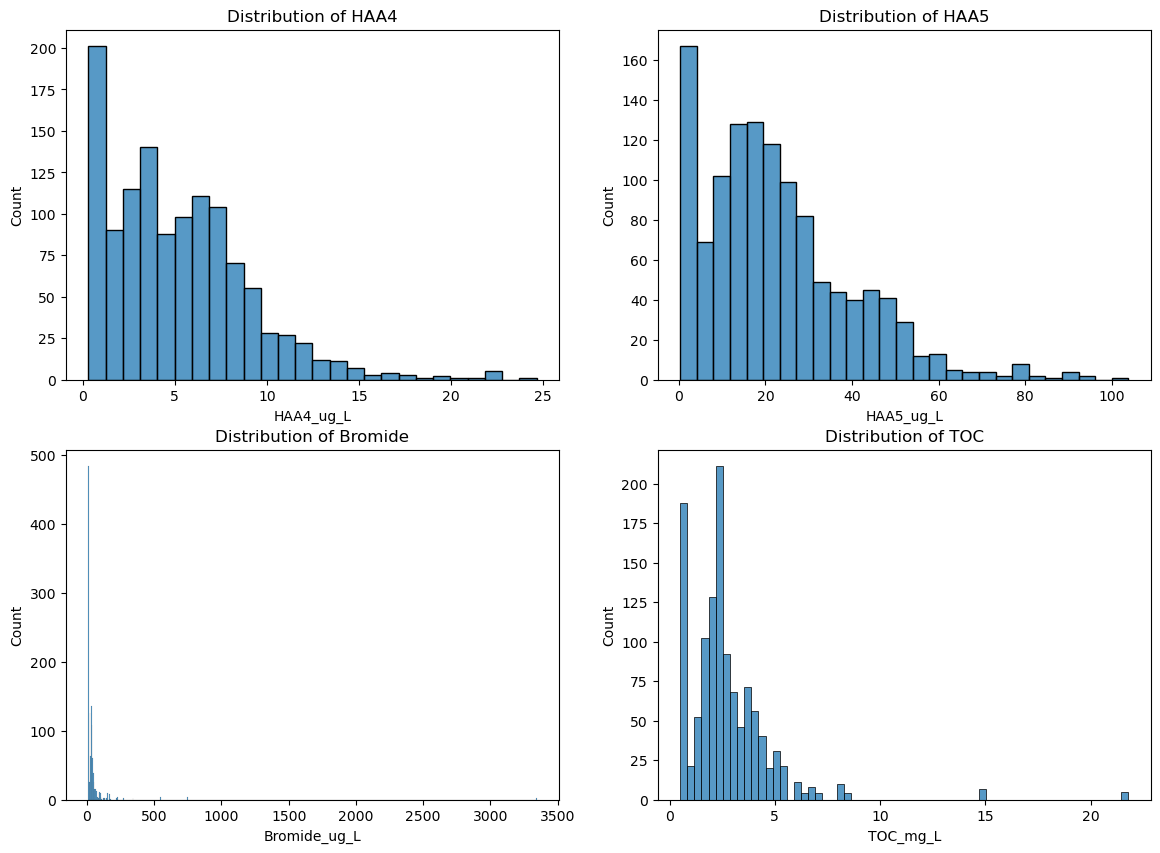

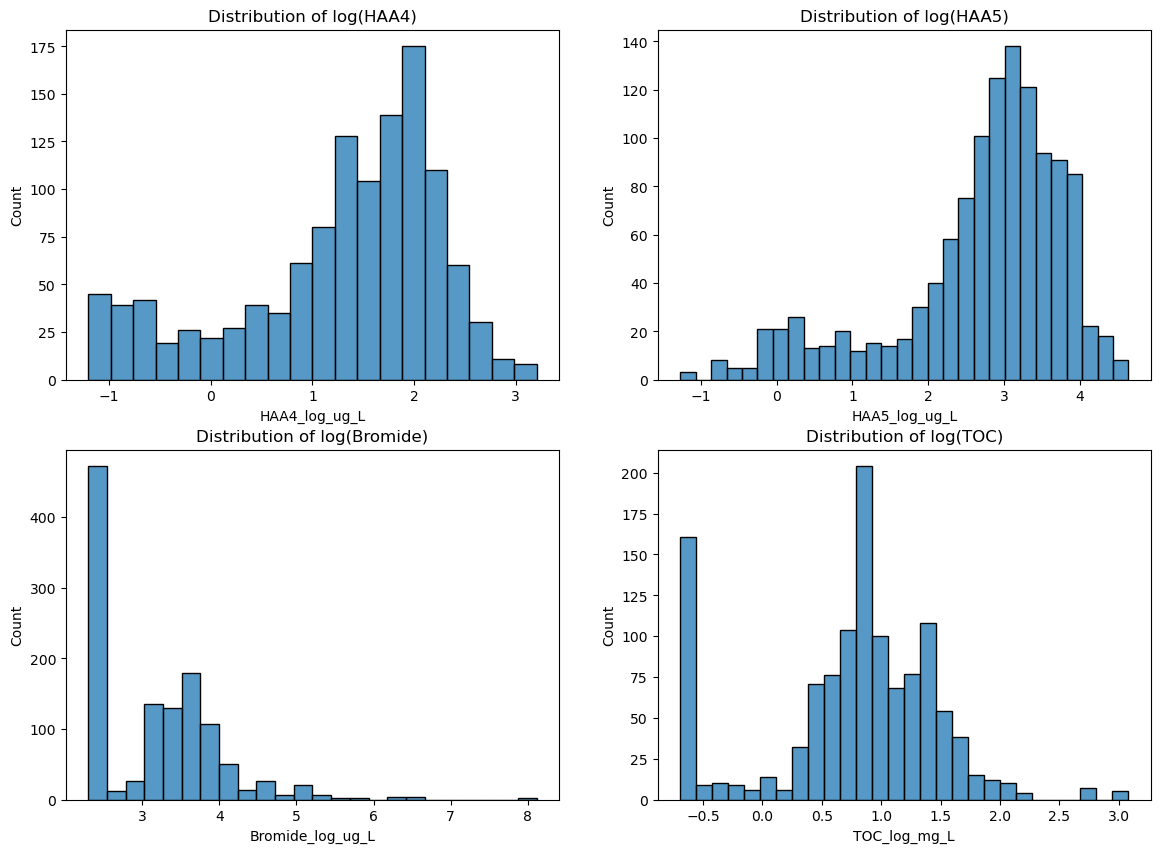

In [80]:
#3a

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.histplot(data = df, x = 'HAA4_ug_L').set(title= 'Distribution of HAA4')

plt.subplot(2,2,2)
sns.histplot(data = df, x = 'HAA5_ug_L').set(title= 'Distribution of HAA5')

plt.subplot(2,2,3)
sns.histplot(data = df, x = 'Bromide_ug_L').set(title= 'Distribution of Bromide')

plt.subplot(2,2,4)
sns.histplot(data = df, x = 'TOC_mg_L').set(title= 'Distribution of TOC')

#3b
df['HAA4_log_ug_L'] = np.log(df['HAA4_ug_L'])
df['HAA5_log_ug_L'] = np.log(df['HAA5_ug_L'])
df['Bromide_log_ug_L'] = np.log(df['Bromide_ug_L'])
df['TOC_log_mg_L'] = np.log(df['TOC_mg_L'])

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.histplot(data = df, x = 'HAA4_log_ug_L').set(title= 'Distribution of log(HAA4)')

plt.subplot(2,2,2)
sns.histplot(data = df, x = 'HAA5_log_ug_L').set(title= 'Distribution of log(HAA5)')

plt.subplot(2,2,3)
sns.histplot(data = df, x = 'Bromide_log_ug_L').set(title= 'Distribution of log(Bromide)')

plt.subplot(2,2,4)
sns.histplot(data = df, x = 'TOC_log_mg_L').set(title= 'Distribution of log(TOC)')


The original variables are highly right-skewed, with long tails and extreme outliers, especially for Bromide. After log transformation, the distributions are more symmetric and closer to normal, with reduced skewness and shorter tails. This stabilizes variance, reduces the influence of outliers, and makes the variables more appropriate for regression modeling.

4. **(1 pt) (a) Similar to problem (2), create a 1X3 panel figure with scatter plots between HAA4 and each of the three continuous predictors, but this time using the log-transformed versions of all variables. Again, be sure to label all axes with units.** 

    **(b) Also calculate and report the Pearson correlation between log-HAA4 and log-HAA5, log-bromide, and log-TOC (all rounded to two decimal places).** 

    **(c) Comment on the strength and sign of the relationships you see. How do the correlation values compare to the correlations in problem #2.**

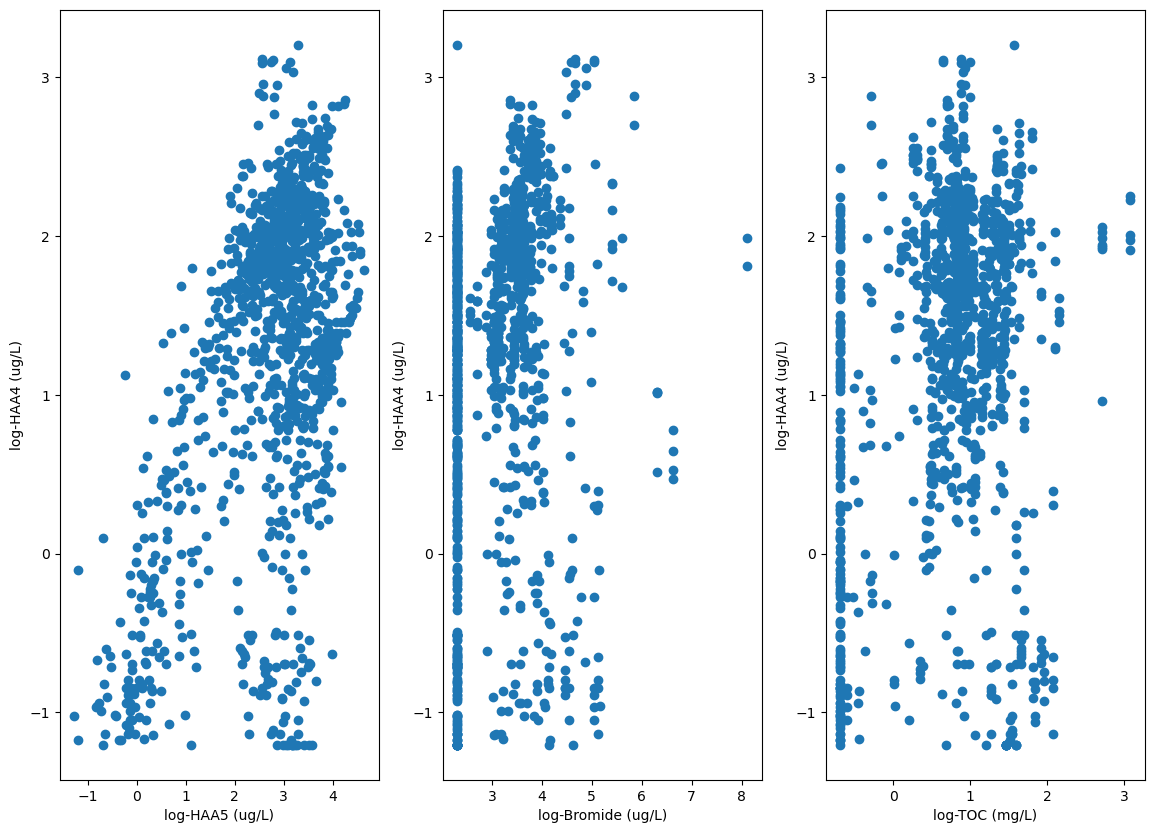

In [84]:
#4
plt.figure(figsize=(14, 10))

plt.subplot(1,3,1)
plt.scatter(data = df, x = 'HAA5_log_ug_L', y = 'HAA4_log_ug_L')
plt.xlabel('log-HAA5 (ug/L)')
plt.ylabel('log-HAA4 (ug/L)')

plt.subplot(1,3,2)
plt.scatter(data = df, x = 'Bromide_log_ug_L', y = 'HAA4_log_ug_L')
plt.xlabel('log-Bromide (ug/L)')
plt.ylabel('log-HAA4 (ug/L)')

plt.subplot(1,3,3)
plt.scatter(data = df, x = 'TOC_log_mg_L', y = 'HAA4_log_ug_L')
plt.xlabel('log-TOC (mg/L)')
plt.ylabel('log-HAA4 (ug/L)')

#4b
c4 = df['HAA4_log_ug_L'].corr(df['HAA5_log_ug_L'])
c5= df['HAA4_log_ug_L'].corr(df['Bromide_log_ug_L'])
c6 = df['HAA4_log_ug_L'].corr(df['TOC_log_mg_L'])


#4c
The correleation coefficients between HAA4-log and HAA5- , Bromide- , and TOC-log are: 0.52, 0.18, 0.23 respectively. The correlations have gotten stronger compared to the non-transformed variables correlations. The strongest correlation is still between HAA4 and HAA5, and has become even more significant in this case.


5. **(1 pt)** Sometimes to understand the relationship between the dependent variable and potential predictors, its useful to fit a simple regression model (with one predictor, often the strongest) and then examine how the residuals of that regression compare to other potential predictors. This approach helps control for the effects of very strong predictors when visually exploring the relationship with other predictors.  

    (a) Create a regression just between log-HAA4 and log-HAA5. 
    
    **(b) Then, plot the residuals of that regression against log-bromide and log-TOC.** 
    
    **(c) Calculate and report the Pearson correlation between the residuals and both log-bromide and log-TOC (rounded to two decimal places).**
    
    **(d) Comment on the sign and strength of these relationships. How do the correlations differ from those seen between log-HAA4 and both log-bromide and log-TOC in problem (4)?** 

Intercept       -0.011806
HAA5_log_ug_L    0.471257
dtype: float64


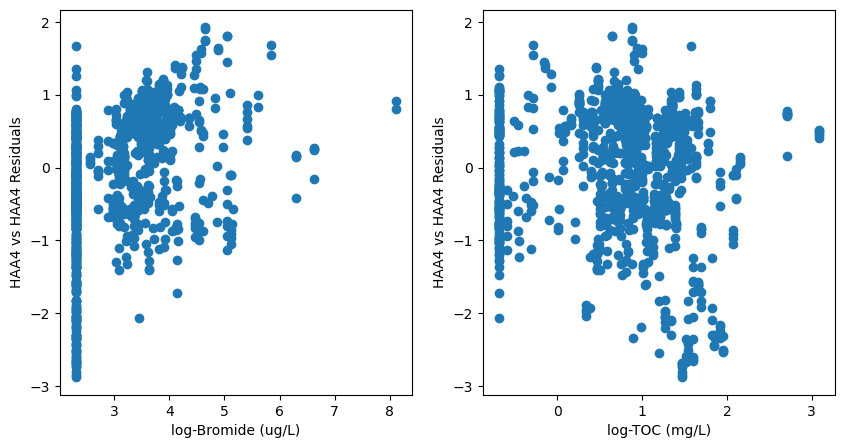

In [85]:
#5
#5a
HAA4_vs_HAA5 = ols("HAA4_log_ug_L ~ HAA5_log_ug_L", data = df).fit()
print(HAA4_vs_HAA5.params)

#5b
HAA4_vs_HAA5_resid = HAA4_vs_HAA5.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y = HAA4_vs_HAA5_resid, x = df['Bromide_log_ug_L'])
plt.xlabel('log-Bromide (ug/L)')
plt.ylabel('HAA4 vs HAA4 Residuals')

plt.subplot(1,2,2)
plt.scatter(y = HAA4_vs_HAA5_resid, x = df['TOC_log_mg_L'])
plt.xlabel('log-TOC (mg/L)')
plt.ylabel('HAA4 vs HAA4 Residuals')

#5c
c7= HAA4_vs_HAA5_resid.corr(df['Bromide_log_ug_L'])
c8 = HAA4_vs_HAA5_resid.corr(df['TOC_log_mg_L'])

#5c
The Pearson correlation between the residuals of the HAA4–HAA5 regression and log-Bromide is 0.42, while the correlation with log-TOC is −0.09.

#5d
The moderate positive correlation with Bromide indicates that Bromide still provides important independent predictive information about HAA4 even after accounting for HAA5. In contrast, the weak negative correlation with TOC suggests that TOC does not contribute much additional explanatory power once HAA5 has been included. Compared to the raw correlations in Problem 4, Bromide remains an important predictor (though attenuated in strength), whereas TOC’s contribution diminishes substantially, likely because its effect overlaps with that of HAA5.

#5d :
The correlation between the residuals of HAA4_vs_HAA5 and the Bromide-log distribution is 0.42, which shows that Bromide could potentially offer an explanation for the randomness in HAA4_vs_HAA5. Hereby suggesting that Bromide can explain some of the variance in HAA4, which HAA5 can't. Regarding the correlation with TOC_log, it is not significant.

6. **(1 pt)** (a) Fit a linear regression between HAA4 and HAA5, bromide, and TOC (in their original units, without log transformation). **Report the summary table from this regression, and comment on:** 
    - **the sign and statistical significance of the effects for each of the three predictors** 
    - **the statistical significance of the overall regression (i.e., using the F-test)**
    - **the predictive power of the regression model.** 

   In all cases, cite evidence from the regression table to support your arguments.

   (b) Fit another linear regression, but this time between log-HAA4 and log-HAA5, log-bromide, and log-TOC. **Report the summary table for this regression and comment on the same three items listed above for the first regression model.**
    
    **(c) Highlight two main differences between these two regression models.** 

In [67]:
#6a
model_full = ols("HAA4_ug_L ~ HAA5_ug_L + Bromide_ug_L + TOC_mg_L", data=df).fit()
model_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HAA4_ug_L   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     24.21
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           3.26e-15
Time:                        11:49:03   Log-Likelihood:                -3284.8
No. Observations:                1200   AIC:                             6578.
Df Residuals:                    1196   BIC:                             6598.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8183      0.212     17.977      0.000       3.402       4.235
HAA5_ug_L        0.0508      0.006      7.839      0.000       0.038       0.064
Bromide_ug_L     0.0019      0.001      2.629      0.009       0.000       0.003
TOC_mg_L         0.0433      0.052      0.837      0.403      -0.058       0.145
==============================================================================
Omnibus:                      261.111   Durbin-Watson:                   0.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.805
Skew:                           1.200   Prob(JB):                    1.69e-127
Kurtosis:                       5.432   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

HAA5 and Bromide seem to have statistical significance since they have lower p-values, whilst TOC doesn't since it has a high p-value. The probability of the F-statistic is very low, hereby showcasing that it is probable that at least one of the variables has a direct relationship with HAA4. Both the r-squared and the adjusted r-squared are very low, which indicates that the model is very poor in explaining the variance of HAA4.

In [68]:
#6b
model_log = ols("HAA4_log_ug_L ~ HAA5_log_ug_L + Bromide_log_ug_L + TOC_log_mg_L", data=df).fit()
model_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HAA4_log_ug_L   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     292.6
Date:                Sat, 04 Oct 2025   Prob (F-statistic):          1.98e-142
Time:                        11:49:03   Log-Likelihood:                -1394.3
No. Observations:                1200   AIC:                             2797.
Df Residuals:                    1196   BIC:                             2817.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.8967      0.123    -15.469      0.000      -2.137      -1.656
HAA5_log_ug_L        0.6382      0.025     25.220      0.000       0.589       0.688
Bromide_log_ug_L     0.4821      0.028     17.084      0.000       0.427       0.537
TOC_log_mg_L        -0.1100      0.038     -2.925      0.004      -0.184      -0.036
==============================================================================
Omnibus:                      111.461   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.345
Skew:                          -0.823   Prob(JB):                     2.03e-31
Kurtosis:                       3.347   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-values now are all showcasing statistical significance for all 3 predictors. The probability of the F-statistic has an even lower value than before, hereby showcasing that it is even more likely that one of the variables has a direct relationship with log-HAA4. Further, the adjusted r-squared and the r-squared are significantly higher which showcase that the model explains the variance in log-HAA4 better.

#6c
The main differences between the original linear regression model, and the transformed one (log) are that the coefficients of determination (r^2 and adjusted r^2) are significantly bigger, and that all predictors showcase statistical significance.

7. **(1 pt)** You will now explore the effects of the other two binary variables in the dataset on HAA4, i.e., the presence or absence of ultraviolet (UV) disinfection and permanganate as a pre-oxidant in the treatment process.

    **(a) Calculate and report the mean concentration of HAA4 (in original units) for those sites that do and do not use UV disinfection, and also the number of sites that do and do not use UV disinfection.** 
    
    **(b) Calculate and report the same quantities for those sites that do and do not use permanganate.** 

    **(c) Create boxplots of HAA4 concentrations (original units) for sites that do and do not use UV disinfection. Create a similar graph for permanganate. Be sure to label both x and y axes.** 

    (d) Include the two binary variables for UV and permanganate treatment in your second regression model from problem #6 that uses the log-transformed variables. **Report the associated regression table, and comment on the sign and significance of effects from these two binary variables.**

    **(e) Finally, compare the predictive power of this model to that of the model you created in problem (6) that uses the log-transformed variables. What metric would be useful to support this comparison and why?** 

UV
no     5.280858
yes    4.243958
Name: HAA4_ug_L, dtype: float64
Permanganate
no     5.003259
yes    6.759625
Name: HAA4_ug_L, dtype: float64


Text(0.5, 1.0, 'HAA4 concentrations for sites with and without Permanganate disinfection')

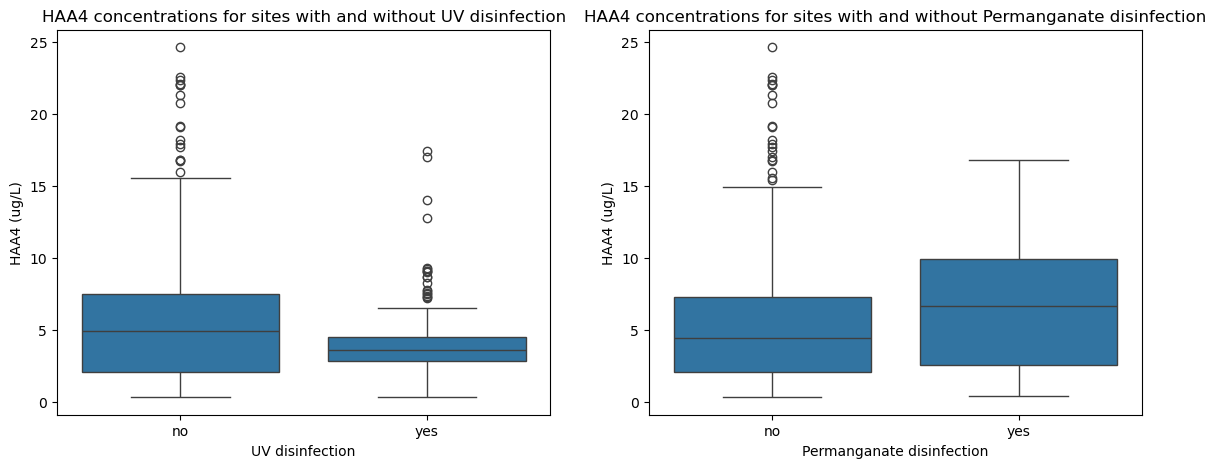

In [69]:
#7a
mean_uv = df.groupby('UV')['HAA4_ug_L'].mean()
print(mean_uv)

#b
mean_permanganate = df.groupby('Permanganate')['HAA4_ug_L'].mean()
print(mean_permanganate)

#c
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'UV', y = 'HAA4_ug_L')
plt.xlabel('UV disinfection')
plt.ylabel('HAA4 (ug/L)')
plt.title('HAA4 concentrations for sites with and without UV disinfection')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Permanganate', y = 'HAA4_ug_L')
plt.xlabel('Permanganate disinfection')
plt.ylabel('HAA4 (ug/L)')
plt.title('HAA4 concentrations for sites with and without Permanganate disinfection')


In [70]:
#d
model_full_2 = ols("HAA4_log_ug_L ~ HAA5_log_ug_L + Bromide_log_ug_L + TOC_log_mg_L + UV + Permanganate", data=df).fit()
model_full_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HAA4_log_ug_L   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sat, 04 Oct 2025   Prob (F-statistic):          3.32e-149
Time:                        11:49:03   Log-Likelihood:                -1372.8
No. Observations:                1200   AIC:                             2758.
Df Residuals:                    1194   BIC:                             2788.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.9112      0.121    -15.852      0.000      -2.148      -1.675
UV[T.yes]              -0.3596      0.076     -4.750      0.000      -0.508      -0.211
Permanganate[T.yes]     0.2956      0.074      4.003      0.000       0.151       0.441
HAA5_log_ug_L           0.6533      0.025     25.973      0.000       0.604       0.703
Bromide_log_ug_L        0.4753      0.028     17.111      0.000       0.421       0.530
TOC_log_mg_L           -0.1090      0.037     -2.948      0.003      -0.181      -0.036
==============================================================================
Omnibus:                      120.985   Durbin-Watson:                   0.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.631
Skew:                          -0.834   Prob(JB):                     5.90e-35
Kurtosis:                       3.609   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#7d
The effect of these 2 binary variables is statistically significant. Both their signs are negative, so they are negatively correlated with the dependent variable HAA4-log.

#7e
The best metric for comparing the models is the adjusted r-squared, since it accounts for the number of predictors. As we can see the adjusted r-squared increased slightly, so it is predicts better the variance in HAA4-log.

8. **(1 pt)** Use nonparametric bootstrapping (with B=1000 bootstrap samples) to double-check the significance of the effect of one of the predictors (log-TOC) for the regression model you developed in problem (7) (i.e.,  the regression of log-HAA4 against log-HAA5, log-bromide, log-TOC, UV, and permanganate). **That is, use nonparametric bootstrapping to calculate and report the probability that the regression coefficicent associated with log-TOC is less than zero.**

the 95% confidence interval for log_TOC is: [-0.19287117 -0.0293435 ]


(array([ 1.,  3.,  6.,  6.,  5., 17., 19., 33., 30., 42., 53., 77., 76.,
        62., 75., 81., 82., 70., 65., 51., 46., 36., 21., 18., 10.,  4.,
         4.,  2.,  1.,  4.]),
 array([-0.24025158, -0.23146401, -0.22267645, -0.21388889, -0.20510132,
        -0.19631376, -0.1875262 , -0.17873863, -0.16995107, -0.16116351,
        -0.15237594, -0.14358838, -0.13480082, -0.12601326, -0.11722569,
        -0.10843813, -0.09965057, -0.090863  , -0.08207544, -0.07328788,
        -0.06450031, -0.05571275, -0.04692519, -0.03813762, -0.02935006,
        -0.0205625 , -0.01177493, -0.00298737,  0.00580019,  0.01458775,
         0.02337532]),
 <BarContainer object of 30 artists>)

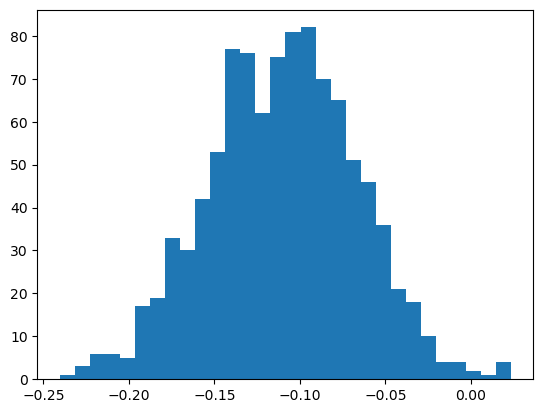

In [71]:
#8
B = 1000
n = len(df)
coefficients = np.zeros((B,1))


for i in range(B):
    sample = df.sample(n, replace=True)
    model_full_3 = ols("HAA4_log_ug_L ~ HAA5_log_ug_L + Bromide_log_ug_L + TOC_log_mg_L + UV + Permanganate", data=sample).fit()
    coefficients[i,:] = model_full_3.params['TOC_log_mg_L']

ci_log_TOC = np.percentile(coefficients, [2.5, 97.5])
print("the 95% confidence interval for log_TOC is:", ci_log_TOC)

plt.hist(coefficients, bins=30)

#8
The bootstrap distribution of the log-TOC coefficient had a 95% confidence interval of [−0.193, −0.029], entirely below zero. Moreover, in 98% of bootstrap replications the coefficient was negative. This indicates strong evidence that log-TOC is a negative predictor of log-HAA4.

9. **(1 pt)** Now let us evaluate whether some key assumptions of the linear regression model are violated. We will perform this exercise on two of the regression models above:
    - the regression of HAA4 on HAA5, bromide, and TOC in original units.
    - the regression of log-HAA4 on log-HAA5, log-bromide, log-TOC, UV, and permanganate.  

    (a) For the first regression model, create two figures, one using a q-q plot to evaluate the normality of the regression residuals, and another plotting the regression residuals against the model's fitted values. Be sure to label all axes. 

    (b) Create the same two figures for the second regression model.

    **(c) Place the four figures in a 2X2 panel plot.**
    
    **(d) For both regression models, provide an interpretation of these figures, both in terms of which assumptions are violated (if any), and the implications of any violations in terms of model use.**

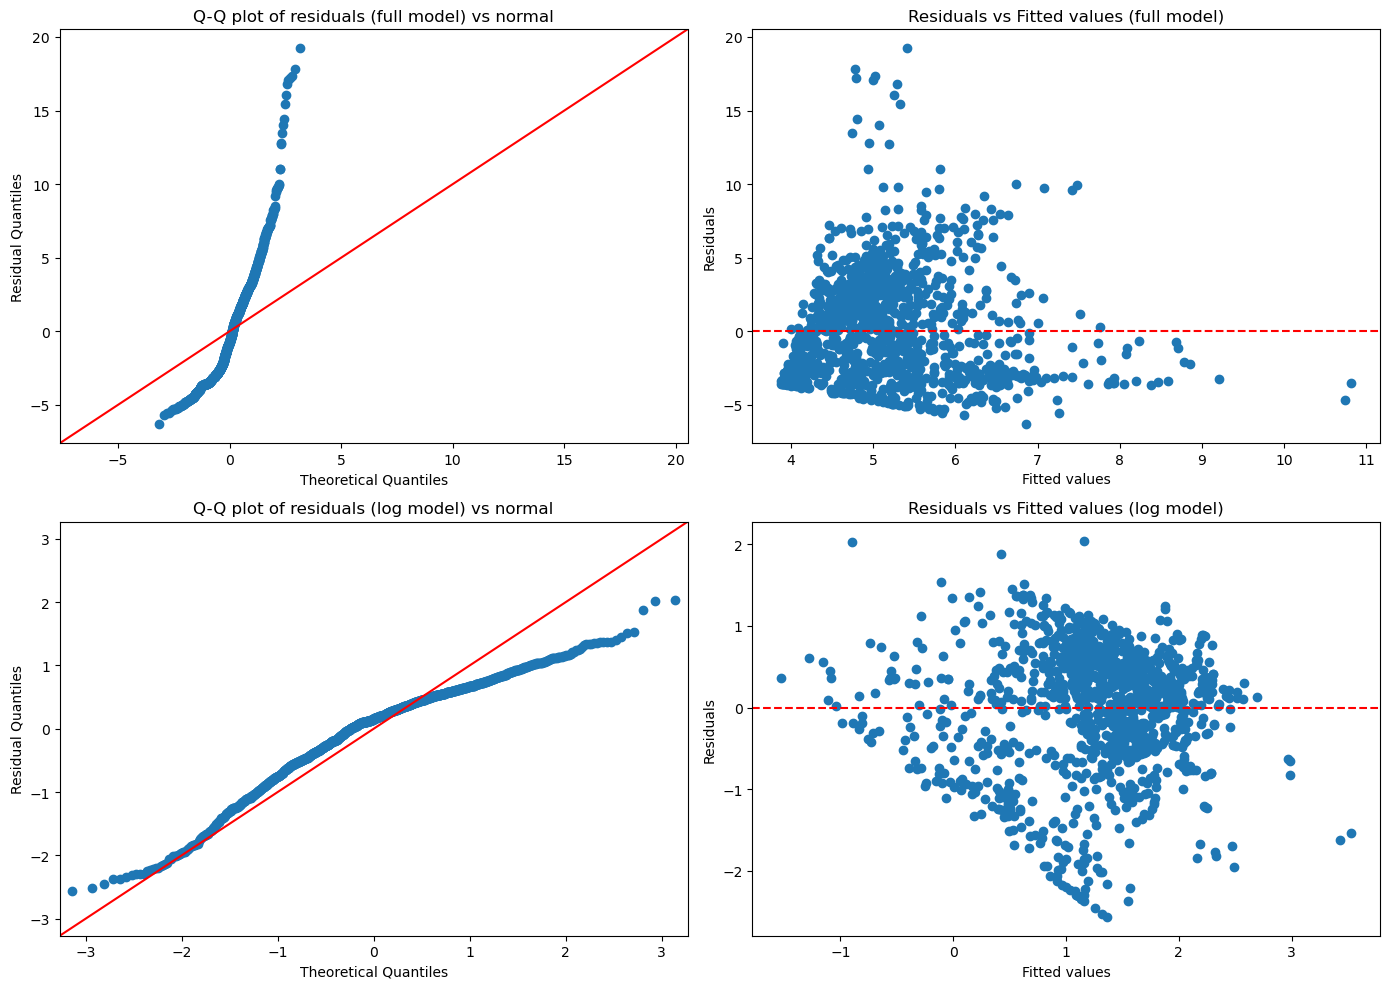

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 9a Q-Q plot full model
sm.qqplot(model_full.resid, line='45', ax=axs[0, 0])
axs[0, 0].set_title('Q-Q plot of residuals (full model) vs normal')
axs[0, 0].set_ylabel('Residual Quantiles')

# 9a Residuals vs fitted (full model)
axs[0, 1].scatter(model_full.fittedvalues, model_full.resid)
axs[0, 1].axhline(0, color='red', linestyle='--')
axs[0, 1].set_xlabel('Fitted values')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].set_title('Residuals vs Fitted values (full model)')

# 9b Q-Q plot log model
sm.qqplot(model_full_2.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q plot of residuals (log model) vs normal')
axs[1, 0].set_ylabel('Residual Quantiles')

# 9b Residuals vs fitted (log model)
axs[1, 1].scatter(model_full_2.fittedvalues, model_full_2.resid)
axs[1, 1].axhline(0, color='red', linestyle='--')
axs[1, 1].set_xlabel('Fitted values')
axs[1, 1].set_ylabel('Residuals')
axs[1, 1].set_title('Residuals vs Fitted values (log model)')

#9c
plt.tight_layout()
plt.show()

#9d
For the regression in the original units, the QQ plot shows that residuals deviate strongly from normality, with heavy right-skew. While mild departures from normality are not always problematic due to the Central Limit Theorem, here the violation is substantial enough to undermine inference. The residuals vs fitted plot further reveals heteroscedasticity: residual variance increases with fitted values, producing a funnel shape. These violations affect both the reliability of statistical inference and the credibility of predictions, especially at higher values of HAA4.

For the regression with log-transformed units, the QQ plot indicates residuals are approximately normal, and the residuals vs fitted plot shows residuals scattered more evenly around zero with roughly constant variance. This suggests the model assumptions of normality and homoscedasticity are much better satisfied. Consequently, inference and prediction are more reliable in the log-transformed model compared to the model in the original units.

10. **(1 pt)** You will now examine the final predictions from the model you created in problem (7) (log-transformed variables with UV and permanganate included), along with the predictive intervals from this model. To do this, you will first estimate the lower and upper 95% predictive intervals. 
    - Note that I am asking for confidence intervals around a new observation, *not* for confidence intervals around the mean regression estimate.
    - You can recover the 95% prediction intervals from your fitted regression object (reg_model) using reg_model.get_prediction().summary_frame()

    **(a) Create a scatter plot of the observed and estimated log-HAA4 values. Be sure to label both axes, with units. Add to this scatter plot the lower and upper predictive intervals as red lines. Also add a 1-to-1 line.** 

    (b) The above plot is entirely in natural log units. However, we are really interested in how well our model (fit on log-transformed data) estimates HAA4 in the original units of ug/L. **Therefore, using back-transformation, create a second scatter plot of observed versus estimated HAA4 values, with 95% predictive intervals, in the original units of the data.** 

    **(c) How does your perception of prediction uncertainty change when viewing the predictions and predictive intervals in original (rather than log) units?**



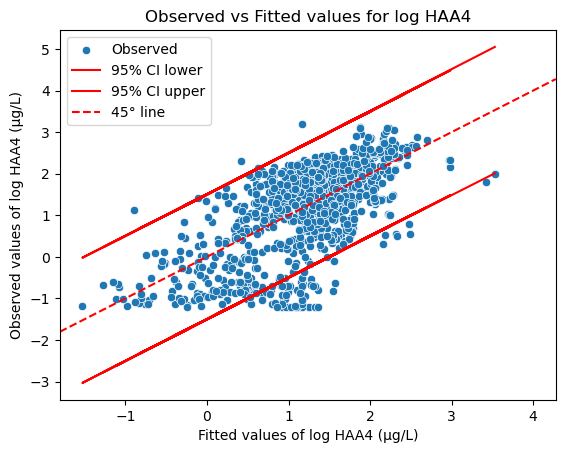

In [73]:
#10a
# Get prediction summary
pred = model_full_2.get_prediction(df).summary_frame()

# Scatter of observed vs fitted
sns.scatterplot(x=model_full_2.fittedvalues, y=df['HAA4_log_ug_L'], label="Observed")

# Add CI lines
plt.plot(model_full_2.fittedvalues, pred['obs_ci_lower'], color='red', label='95% CI lower')
plt.plot(model_full_2.fittedvalues, pred['obs_ci_upper'], color='red', label='95% CI upper')

# Labels & title
plt.xlabel('Fitted values of log HAA4 (µg/L)')
plt.ylabel('Observed values of log HAA4 (µg/L)')
plt.title('Observed vs Fitted values for log HAA4')

# 45-degree reference line
plt.axline([0, 0], [4, 4], color='red', linestyle='--', label="45° line")

plt.legend()
plt.show()

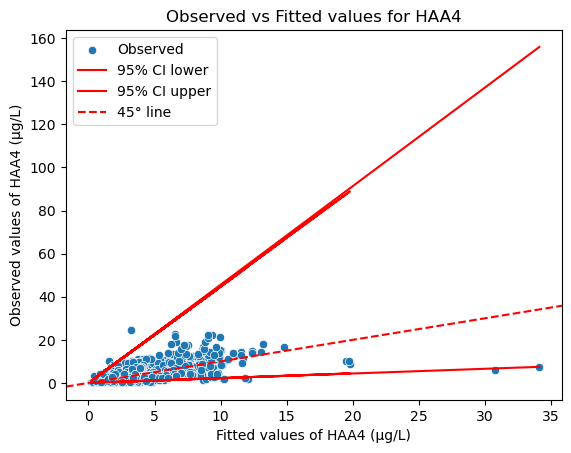

In [74]:
#10b

# Scatter of observed vs fitted
sns.scatterplot(x=np.exp(model_full_2.fittedvalues), y=df['HAA4_ug_L'], label="Observed")

# Add CI lines
plt.plot(np.exp(model_full_2.fittedvalues), np.exp(pred['obs_ci_lower']), color='red', label='95% CI lower')
plt.plot(np.exp(model_full_2.fittedvalues), np.exp(pred['obs_ci_upper']), color='red', label='95% CI upper')

# Labels & title
plt.xlabel('Fitted values of HAA4 (µg/L)')
plt.ylabel('Observed values of HAA4 (µg/L)')
plt.title('Observed vs Fitted values for HAA4')

# 45-degree reference line
plt.axline([0, 0], [4, 4], color='red', linestyle='--', label="45° line")

plt.legend()
plt.show()

#10c
When viewed in the log scale, prediction uncertainty feels modest, consistent, and symmetric across all fitted values.
But when transformed back into the original units, uncertainty appears much larger, highly variable, and asymmetric, especially at higher values of HAA4. This highlights why log transformation is useful: it stabilizes variance and makes uncertainty easier to interpret.

11. **(1 pt)** As a final exercise, estimate the regression model parameters from the model in problem (7) (i.e., log-transformed variables with UV and permanganate included) using batch gradient descent. **Show a plot of mean squared error (MSE) versus iteration in the gradient descent algorithm. Also report the final set of estimated regression coefficients, and confirm that they match your estimated coefficients from problem (7).**

    When completing this problem, note the following:
    - You will want to create a predictor matrix X for use in this problem that 1) contains a vector of 1's for the intercept coefficient, and 2) converts the 'yes' and 'no' values for UV and permanganate treatment to 1's and 0's. 
    - Batch gradient descent requires that you estimate the model prediction (the design matrix multiplied by the regression coefficient vector Beta) over all observations in the data. This can be done very efficiently using matrix multiplication, which can be implemented using the np.matmul function.     
    - We want to directly compare the regression coefficient values estimated using OLS (from problem #7) to the coefficients estimated using batch gradient descent. Therefore, you should not scale the predictors between 0-1 in this implementation of gradient descent, because we did not scale them in problem #7 above. 
    - Because we are not going to scale our predictors, selecting the learning rate is a bit tricky. Learning rates of ~0.01 or ~0.001 usually work well for scaled predictors, and it turns out that a learning rate of 0.01 will work in this problem as well (as long as the number of iterations is sufficiently large). 
    - However, if the predictors are unscaled, its not always the case that a learning rate around 0.01 will lead to convergence. Additionally, a learning rate of 0.01 may lead to extremely slow convergence. So in general, it is usually recommended to scale your predictors (even though I'm asking you not to do that here).  
   

Estimated coefficients: [-1.82585935  0.6426114   0.45804608 -0.10826314 -0.35828708  0.29511044]


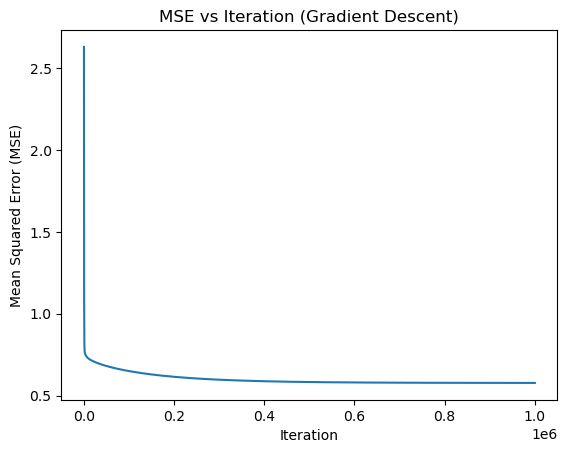

In [76]:
# Select variables
df_model = df[['HAA5_log_ug_L', 'Bromide_log_ug_L', 'TOC_log_mg_L', 'UV', 'Permanganate']].copy()

# Encode categorical as binary
df_model['UV'] = np.where(df_model['UV'] == 'yes', 1, 0)
df_model['Permanganate'] = np.where(df_model['Permanganate'] == 'yes', 1, 0)

# Add intercept
df_model.insert(0, 'intercept', 1)

# Convert to matrix
X = df_model.values # shape (n, p)
y = df['HAA4_log_ug_L'].values.reshape(-1, 1) # shape (n, 1)

# Initialize beta
beta = np.zeros((X.shape[1], 1))

# Hyperparameters
alpha = 0.0001
iterations = 1000000
n = len(X)

# Store history
beta_history = []
mse_history = []

for it in range(iterations):
    # Predictions
    y_pred = np.matmul(X, beta)

    # Gradient
    gradient = (1/n) * np.matmul(X.T, (y_pred - y))

    # Update step
    beta = beta - alpha * gradient

    # Save beta values
    beta_history.append(beta.flatten().copy())

    # Compute MSE
    mse = np.mean((y_pred - y) ** 2)
    mse_history.append(mse)

print("Estimated coefficients:", beta.flatten())

# --- Plot learning curve ---
plt.plot(range(iterations), mse_history)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs Iteration (Gradient Descent)")
plt.show()



In [78]:
#coefficients of the original model
print('OLS fitted coefficients')
print(model_full_2.params)

#Coefficients from gradient descent
print("Estimated coefficients gradient descent:")
print('intercept:', beta.flatten()[0])
print('HAA5_log_ug_L:', beta.flatten()[1])
print('Bromide_log_ug_L:', beta.flatten()[2])
print('TOC_log_mg_L:', beta.flatten()[3])
print('UV:', beta.flatten()[4])
print('Permanganate:', beta.flatten()[5])

OLS fitted coefficients
Intercept             -1.911167
UV[T.yes]             -0.359644
Permanganate[T.yes]    0.295625
HAA5_log_ug_L          0.653347
Bromide_log_ug_L       0.475281
TOC_log_mg_L          -0.108966
dtype: float64
Estimated coefficients gradient descent:
intercept: -1.825859347459772
HAA5_log_ug_L: 0.6426113953377474
Bromide_log_ug_L: 0.45804608120472784
TOC_log_mg_L: -0.1082631429312568
UV: -0.3582870806546685
Permanganate: 0.2951104384549068


By trial and error regarding finding the correct hyperparameters, we were able to find very similar coefficients by batch gradient descent, compared to the OLS fitted coefficients.

I used ChatGPT (OpenAI, 2025) in support of my solutions to problems 9, 10, 11 on this assignment.
OpenAI. (2025). ChatGPT (August 28 version) [Large language model]. https://chat.openai.com